In [1]:
library(gplots)
library("viridis")   


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite



In [5]:
setwd("/Volumes/Work/Code/GlyCompare/example_data/Riley2019_SiteSpec/")
r_comp = t(read.csv('data-in/paper_nature_abundance_table.csv',row.names = 1))
comp_annot = read.csv('data-in/paper_nature_variable_annotation.csv',row.names=1)
comp_annot[,1] = gsub('\\]|\\[','.',as.character(comp_annot[,1]))
rownames(r_comp) = comp_annot[match(rownames(r_comp),comp_annot[,1]),2]
r_comp = aggregate(r_comp,by=list(rownames(r_comp)),sum)
rownames(r_comp) = r_comp$Group.1
r_comp = data.matrix(r_comp[,-1])

r_subt = t(t(read.csv('data-in/paper_nature_motif_abd_table_composition.csv',row.names = 1)))

head(r_comp)
head(r_subt)

,A0A087WPX3_1133,A0A087WPX3_1154,A0A087WPX3_409,A0A087WPX3_446,A0A087WPX3_778,A0A087WPX3_838,A0A087WPX3_973,A0A087WPX3_988,A0A087WQE8_272,A0A0A6YW22_104,⋯,Q9Z1M0_74,Q9Z247_174,Q9Z247_286,Q9Z2A9_303,Q9Z2L6_236,Q9Z2W8_258,Q9Z2W8_371,Q9Z2W8_407,Q9Z2W9_260,Q9Z2W9_374
HexNAc(1),0,0,0,7,0,0,4,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HexNAc(2),0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HexNAc(2)Fuc(1),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HexNAc(2)Hex(1),0,3,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HexNAc(2)Hex(1)Fuc(1),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
HexNAc(2)Hex(10),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,A0A087WPX3_1133,A0A087WPX3_1154,A0A087WPX3_409,A0A087WPX3_446,A0A087WPX3_778,A0A087WPX3_838,A0A087WPX3_973,A0A087WPX3_988,A0A087WQE8_272,A0A0A6YW22_104,⋯,Q9Z1M0_74,Q9Z247_174,Q9Z247_286,Q9Z2A9_303,Q9Z2L6_236,Q9Z2W8_258,Q9Z2W8_371,Q9Z2W8_407,Q9Z2W9_260,Q9Z2W9_374
"('Fuc(1)',)",1,14,24,16,0,12,24,5,0,0,⋯,0,1,2,0,11,12,4,0,11,2
"('Fuc(1)', 'NeuAc(1)')",1,0,0,3,0,4,2,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
"('Fuc(1)', 'NeuAc(2)')",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
"('Fuc(2)',)",0,3,0,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
"('Fuc(2)', 'NeuAc(1)')",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
"('Fuc(3)',)",0,6,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
min=2

# remove repeated rows and cols
r_comp = t(unique(t(unique(r_comp))))
r_subt = t(unique(t(unique(r_subt))))

# remove low count rows
r_comp = (r_comp[rowSums(r_comp)>min,])
r_subt = (r_subt[rowSums(r_subt)>min,])

# retain common sites
r_comp = r_comp[,colnames(r_comp) %in% colnames(r_subt)]
r_subt = r_subt[,colnames(r_subt) %in% colnames(r_comp)]

# remove low count cols
keep_cols = colSums(r_comp)>min | colSums(r_subt)>min
r_comp = (r_comp[,keep_cols])
r_subt = (r_subt[,keep_cols])

# retain common sites
r_comp = r_comp[,colnames(r_comp) %in% colnames(r_subt)]
r_subt = r_subt[,colnames(r_subt) %in% colnames(r_comp)]

dim(r_comp)
dim(r_subt)

[1]  78 879

[1] 152 879

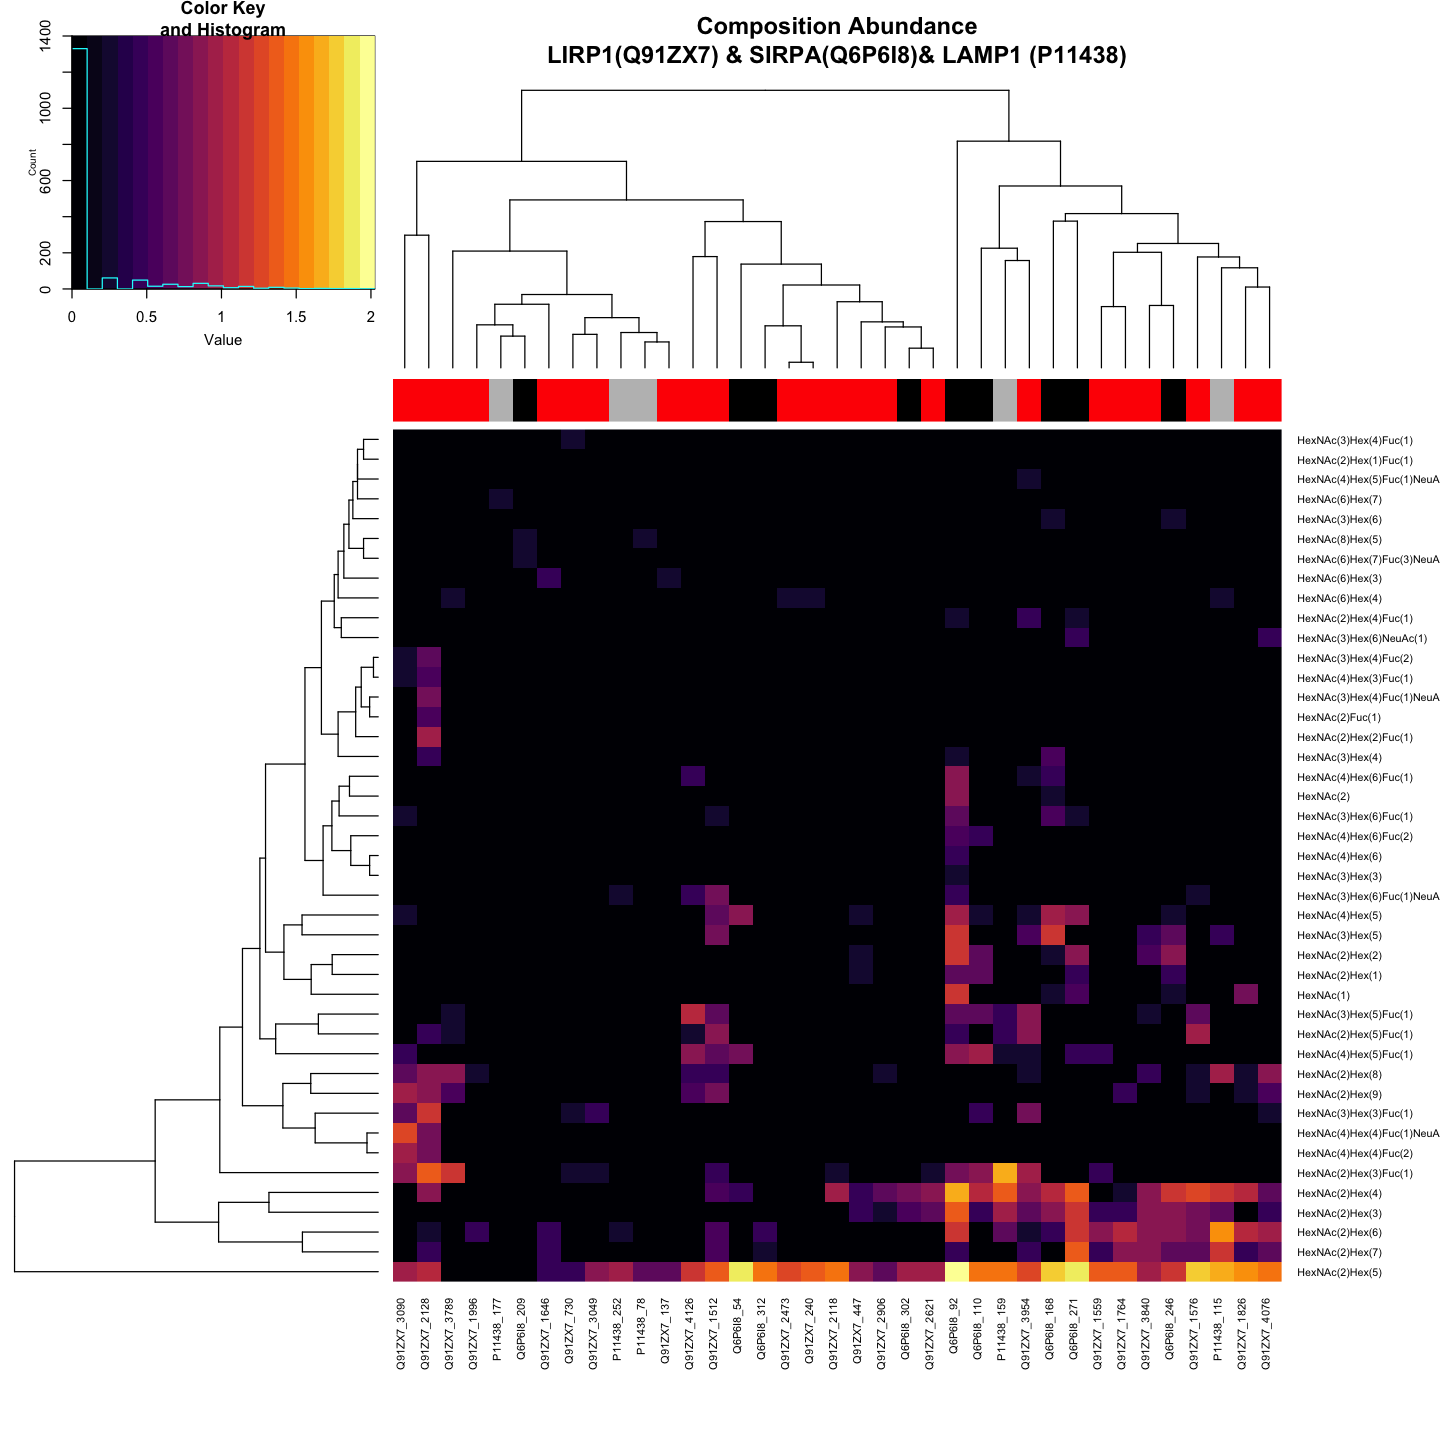

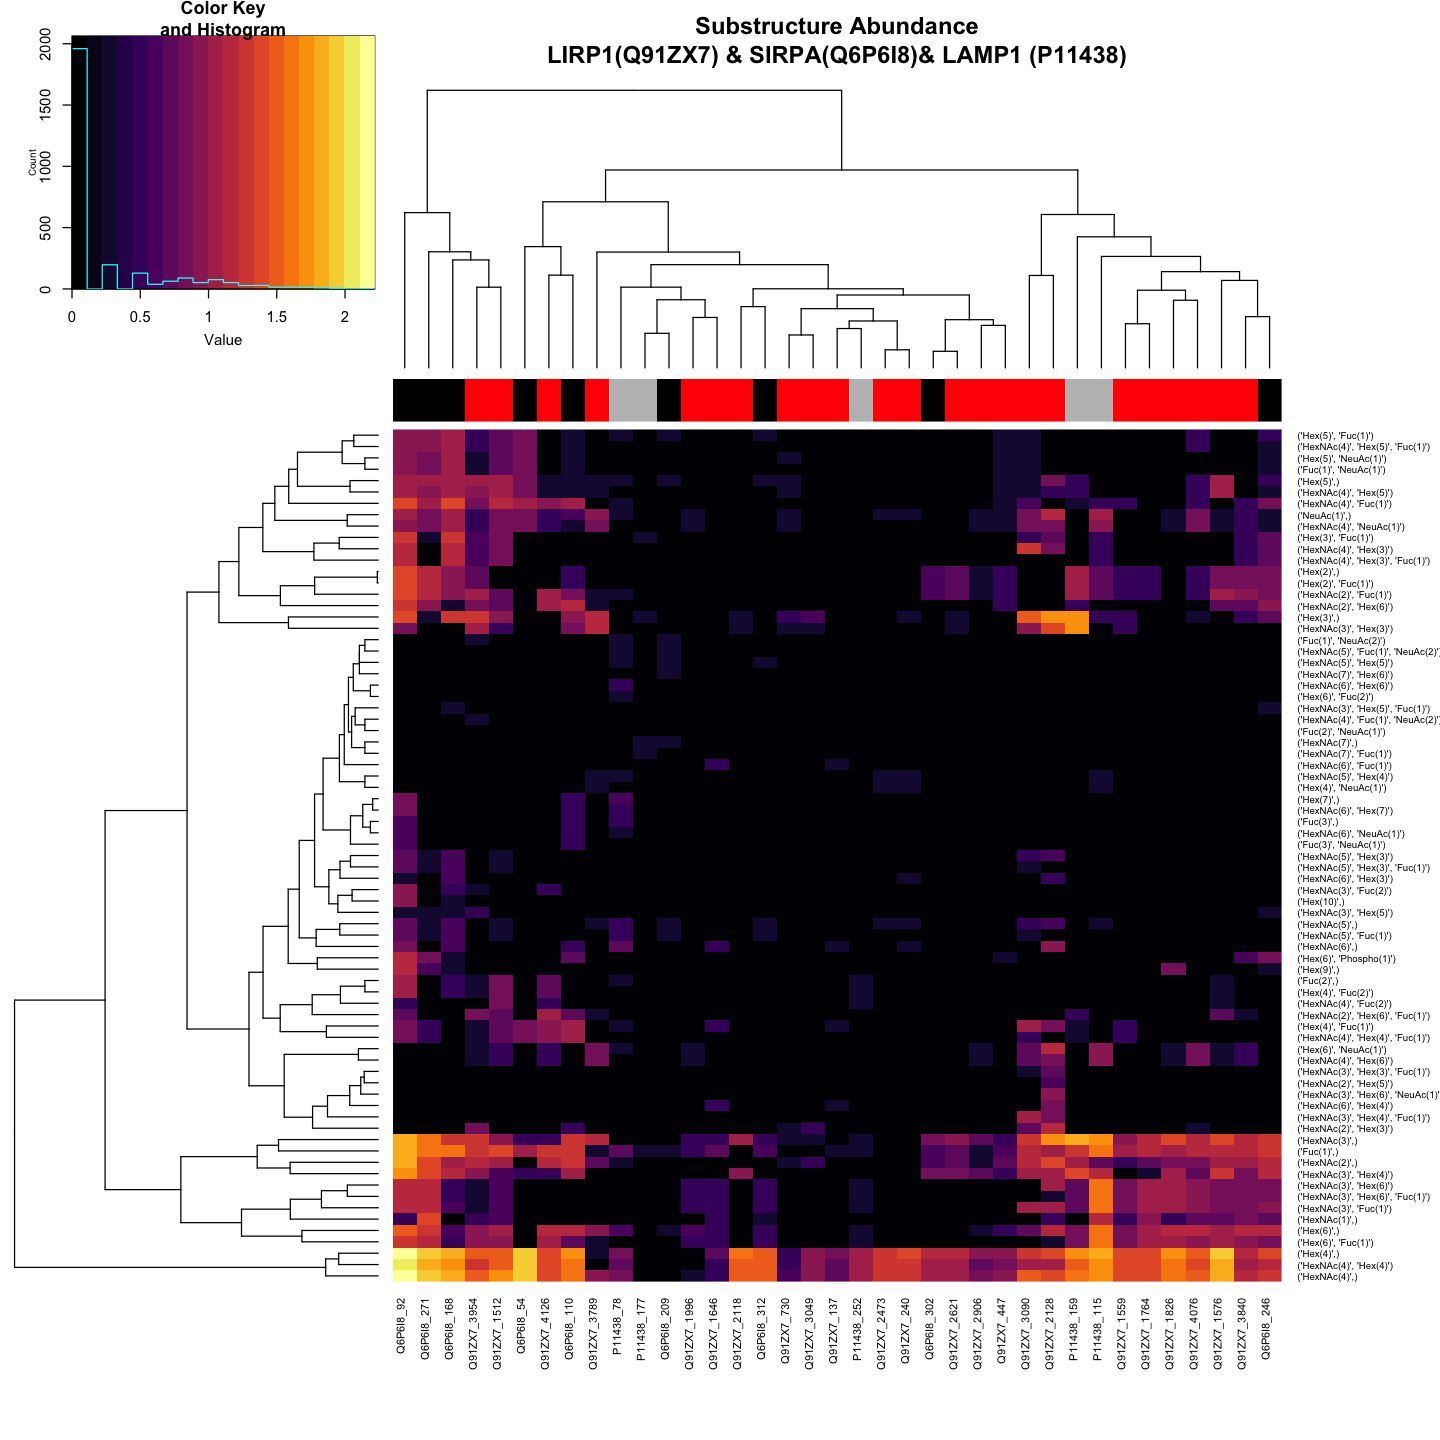

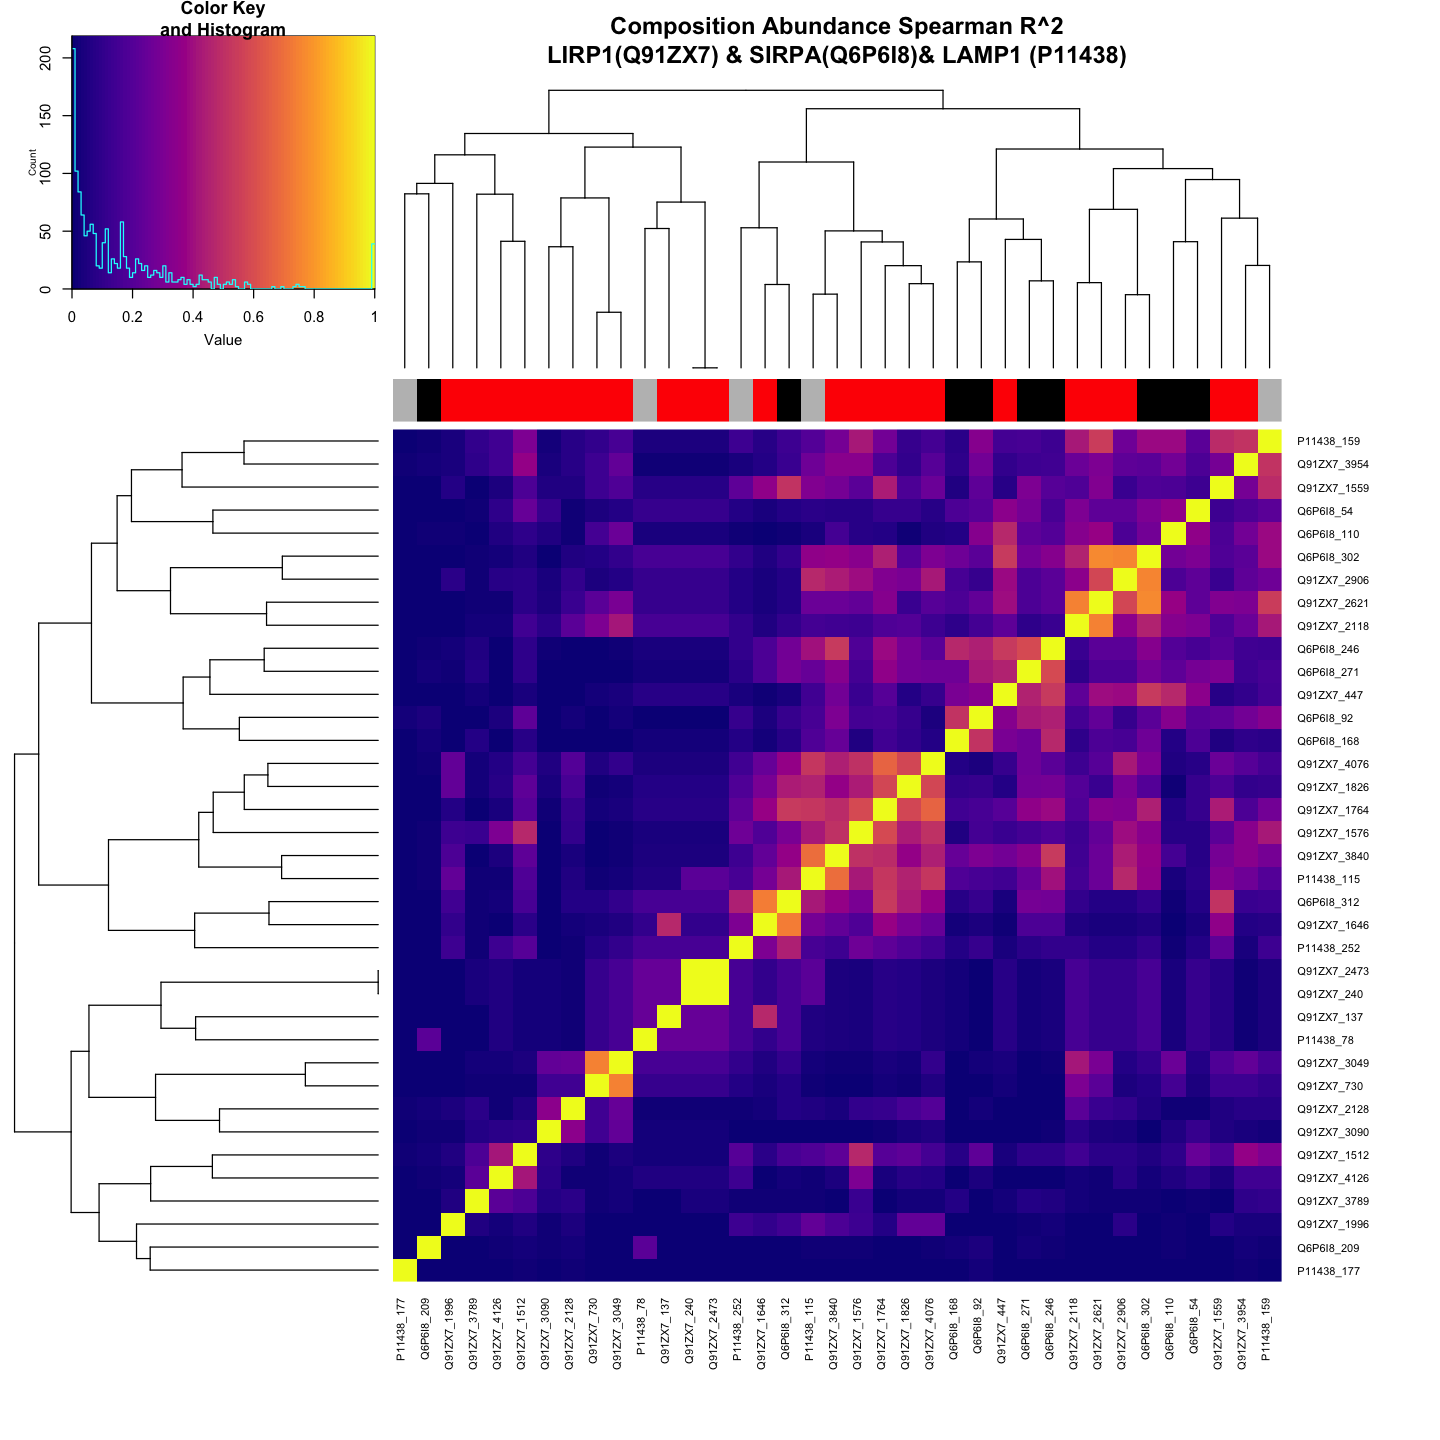

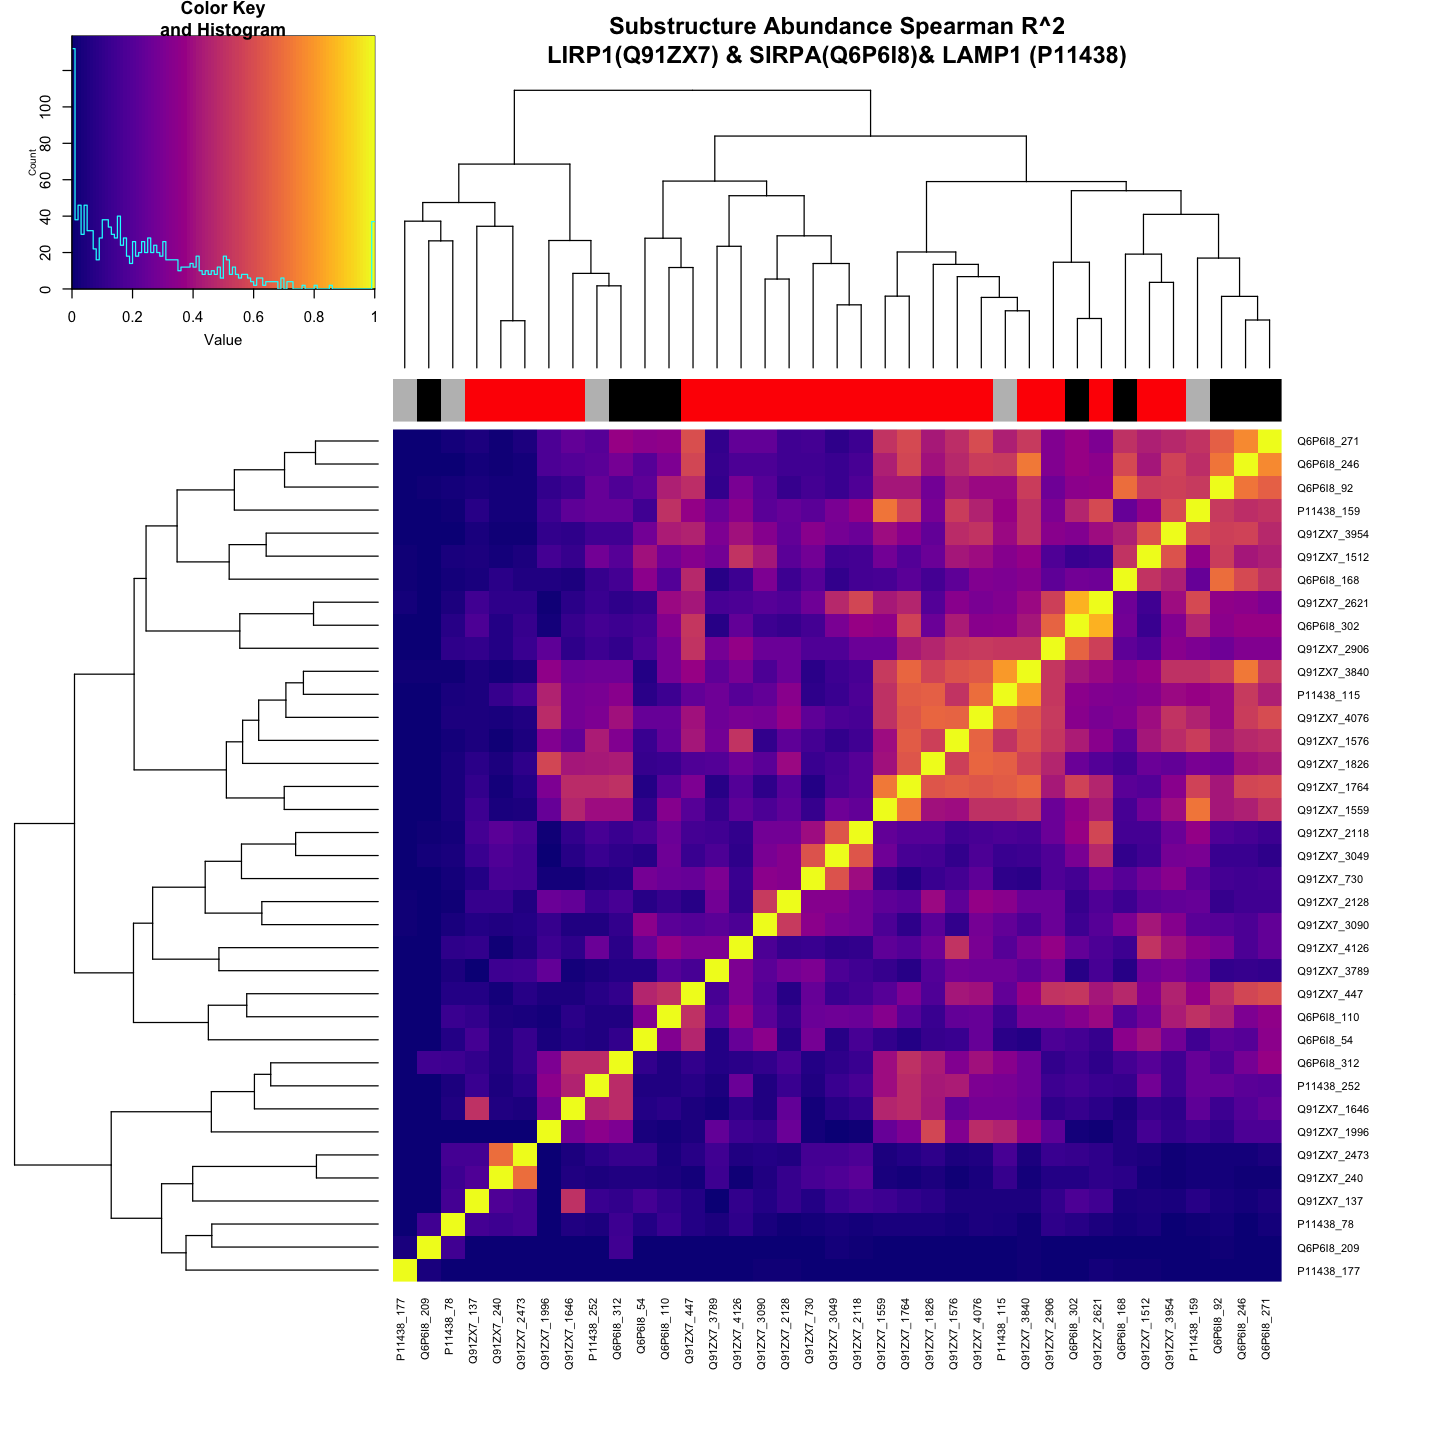

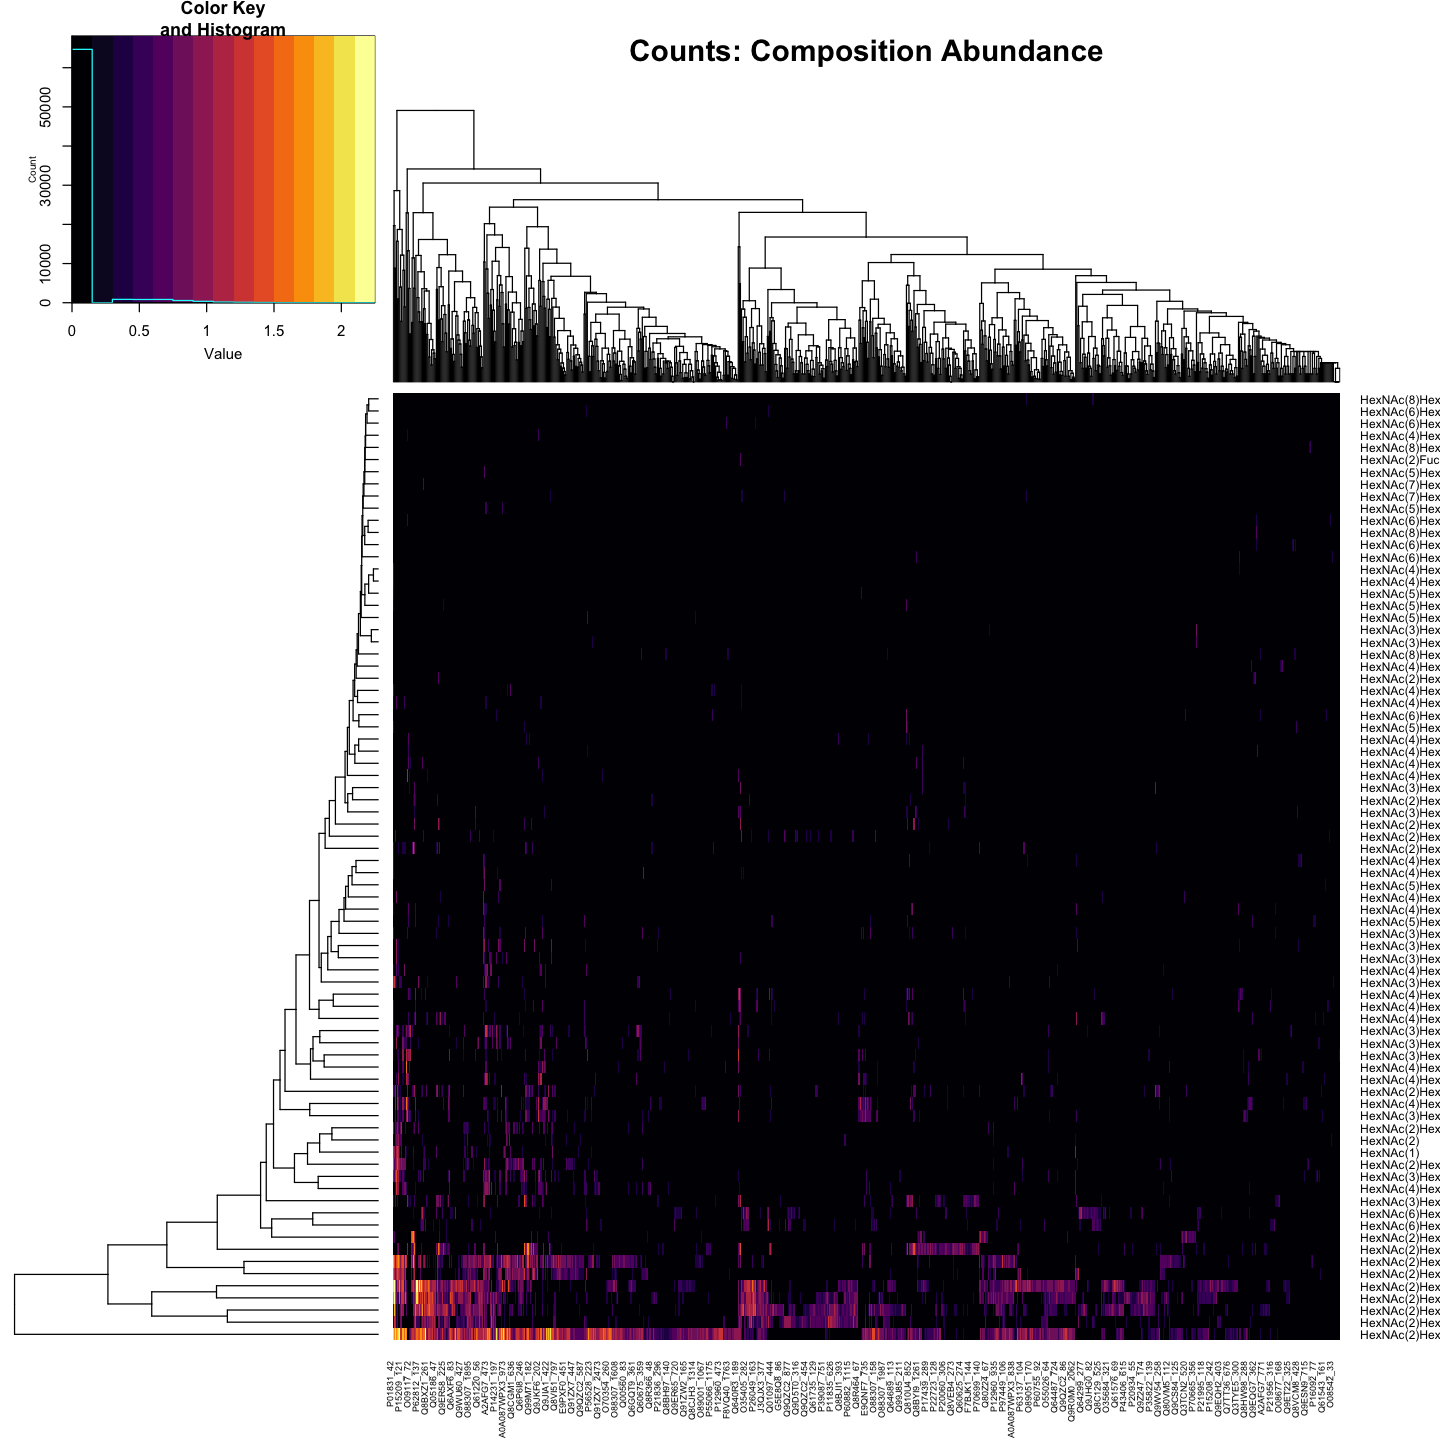

Warning message in cor(log10(unique(r_comp) + 1), method = "spearman"):
“the standard deviation is zero”


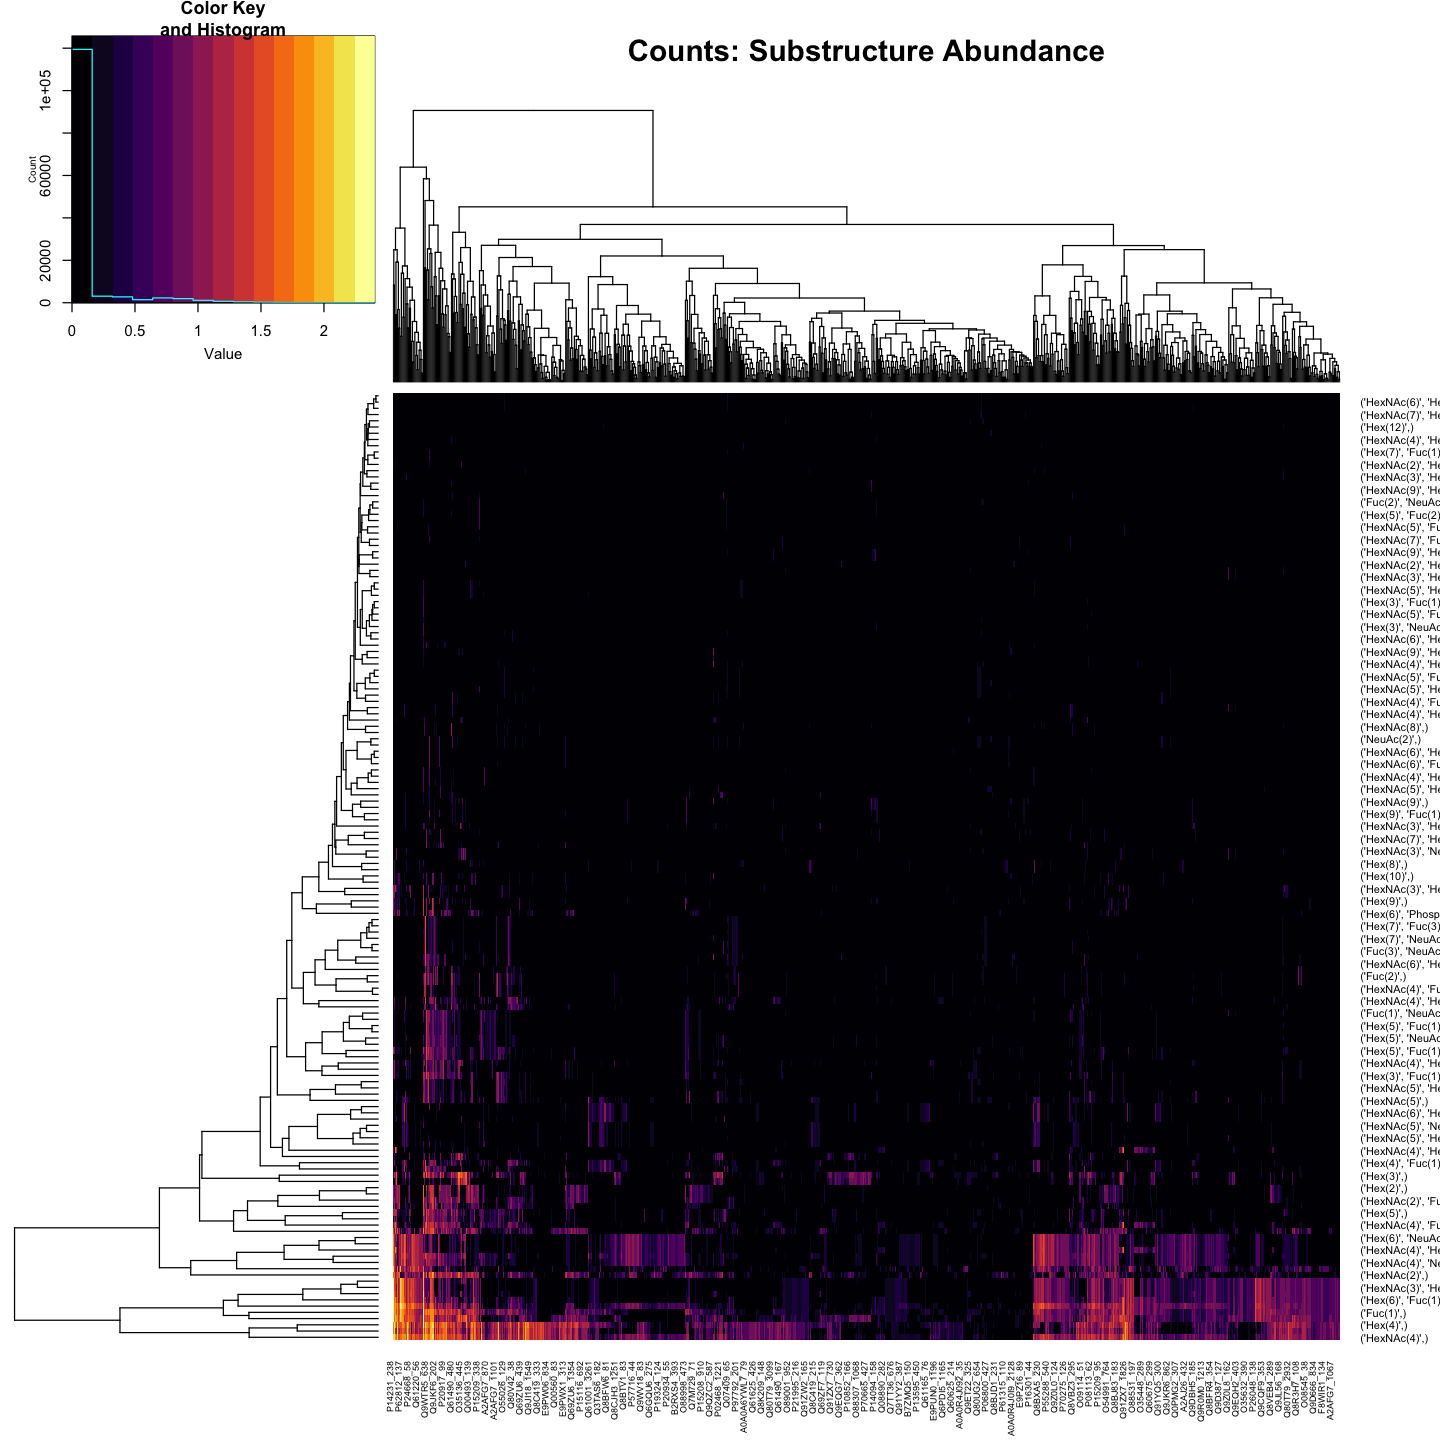

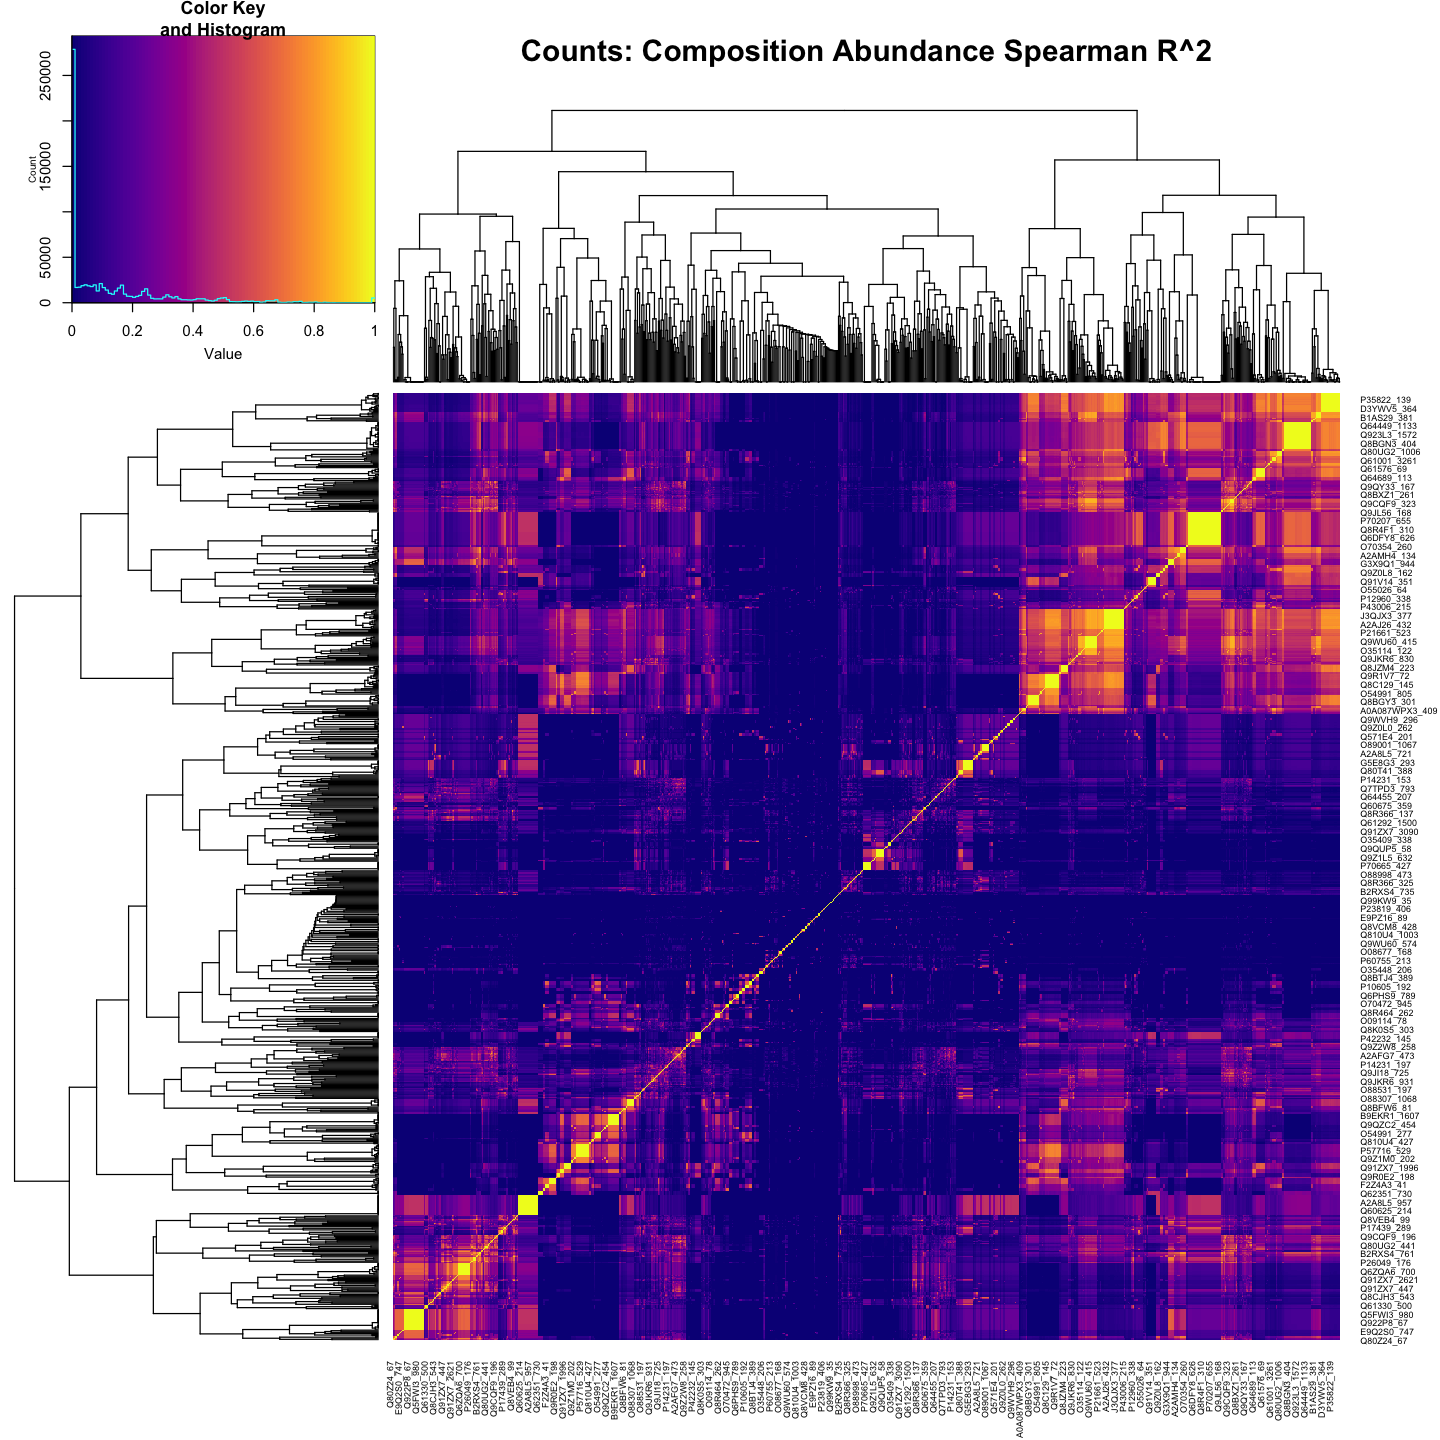

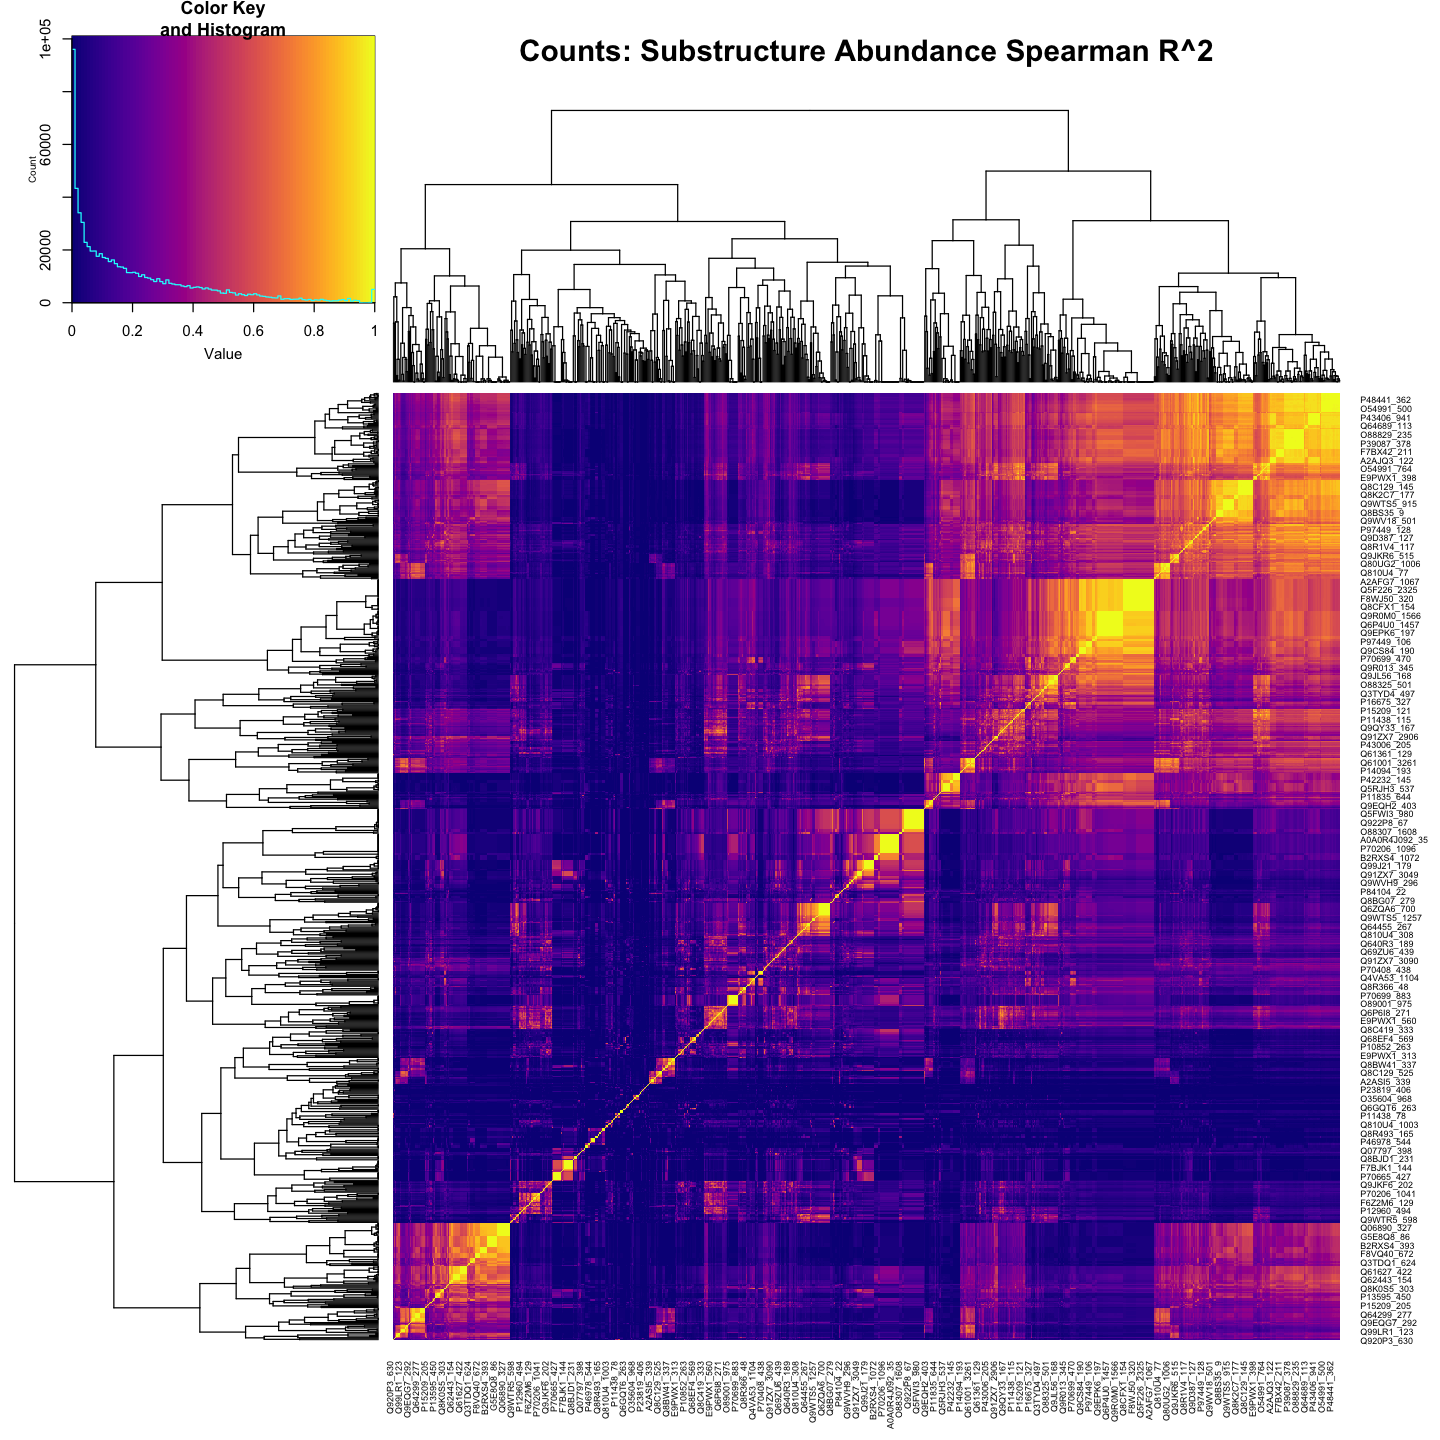

In [7]:
# Q91ZX7|Q6P6I8 : LIRP1(Q91ZX7) & SIRPA(Q6P6I8)
# P11627|Q810U4 : L1CAM (P11627) & NRCAM (Q810U4)

options(repr.plot.width=12, repr.plot.height=12)


idx = grepl('Q91ZX7|Q6P6I8|P11438',colnames(r_comp))
ccol=c('red','black','grey')[factor(gsub('_.*','',colnames(r_comp)[idx]),levels=c('Q91ZX7','Q6P6I8','P11438'))]
scol=ccol
#scol=c('red','black','grey')[factor(gsub('_.*','',colnames(r_subt)[idx]),levels=c('Q91ZX7','Q6P6I8','P11438'))]

heatmap.2(log10(unique(r_comp[,idx])+1),trace='none',col=inferno(20),ColSideColors = ccol,main='Composition Abundance\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
heatmap.2(log10(unique(r_subt[,idx])+1),trace='none',col=inferno(20),ColSideColors = scol,main='Substructure Abundance\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
       
cr_comp=(cor(log2(unique(r_comp[,idx])+1),method='spearman'))^2
cr_subt=(cor(log2(unique(r_subt[,idx])+1),method='spearman'))^2
heatmap.2(cr_comp,trace='none',col=plasma,breaks=seq(0,1,.01), ColSideColors = ccol,main='Composition Abundance Spearman R^2\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
heatmap.2(cr_subt,trace='none',col=plasma,breaks=seq(0,1,.01),ColSideColors = scol,main='Substructure Abundance Spearman R^2\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))

###  all proteins
log_r_comp = log10(unique(r_comp)+1)
log_r_subt = log10(unique(r_subt)+1)
write.table(log_r_comp, file="results/supple_figure_log_r_comp.csv", sep=',')
write.table(log_r_subt, file="results/supple_figure_log_r_subt.csv", sep=',')

heatmap.2(log10(unique(r_comp)+1),trace='none',col=inferno,main='Counts: Composition Abundance')
heatmap.2(log10(unique(r_subt)+1),trace='none',col=inferno,main='Counts: Substructure Abundance')
       
cr_comp=(cor(log10(unique(r_comp)+1),method='spearman'))^2
cr_comp[is.na(cr_comp)] = 0
cr_subt=(cor(log10(unique(r_subt)+1),method='spearman'))^2
cr_subt[is.na(cr_subt)] = 0

write.table(cr_comp, file="results/supple_figure_cr_comp.csv", sep=',')
write.table(cr_subt, file="results/supple_figure_cr_subt.csv", sep=',')

heatmap.2(cr_comp,trace='none',col=plasma,breaks=seq(0,1,.01),main='Counts: Composition Abundance Spearman R^2')
heatmap.2(cr_subt,trace='none',col=plasma,breaks=seq(0,1,.01),main='Counts: Substructure Abundance Spearman R^2')


	Wilcoxon rank sum test with continuity correction

data:  (as.vector(cr_comp)) and (as.vector(cr_subt))
W = 2.2083e+11, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  (as.vector(cr_comp)) and (as.vector(cr_subt))
t = -205.96, df = 1512543, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06832840 -0.06704019
sample estimates:
mean of x mean of y 
0.1437068 0.2113911 


         0%         25%         50%         75%        100% 
0.000000000 0.001598724 0.069343733 0.224380936 1.000000000 
        0%        25%        50%        75%       100% 
0.00000000 0.03644427 0.13829637 0.32093227 1.00000000 


50% 
0.99436

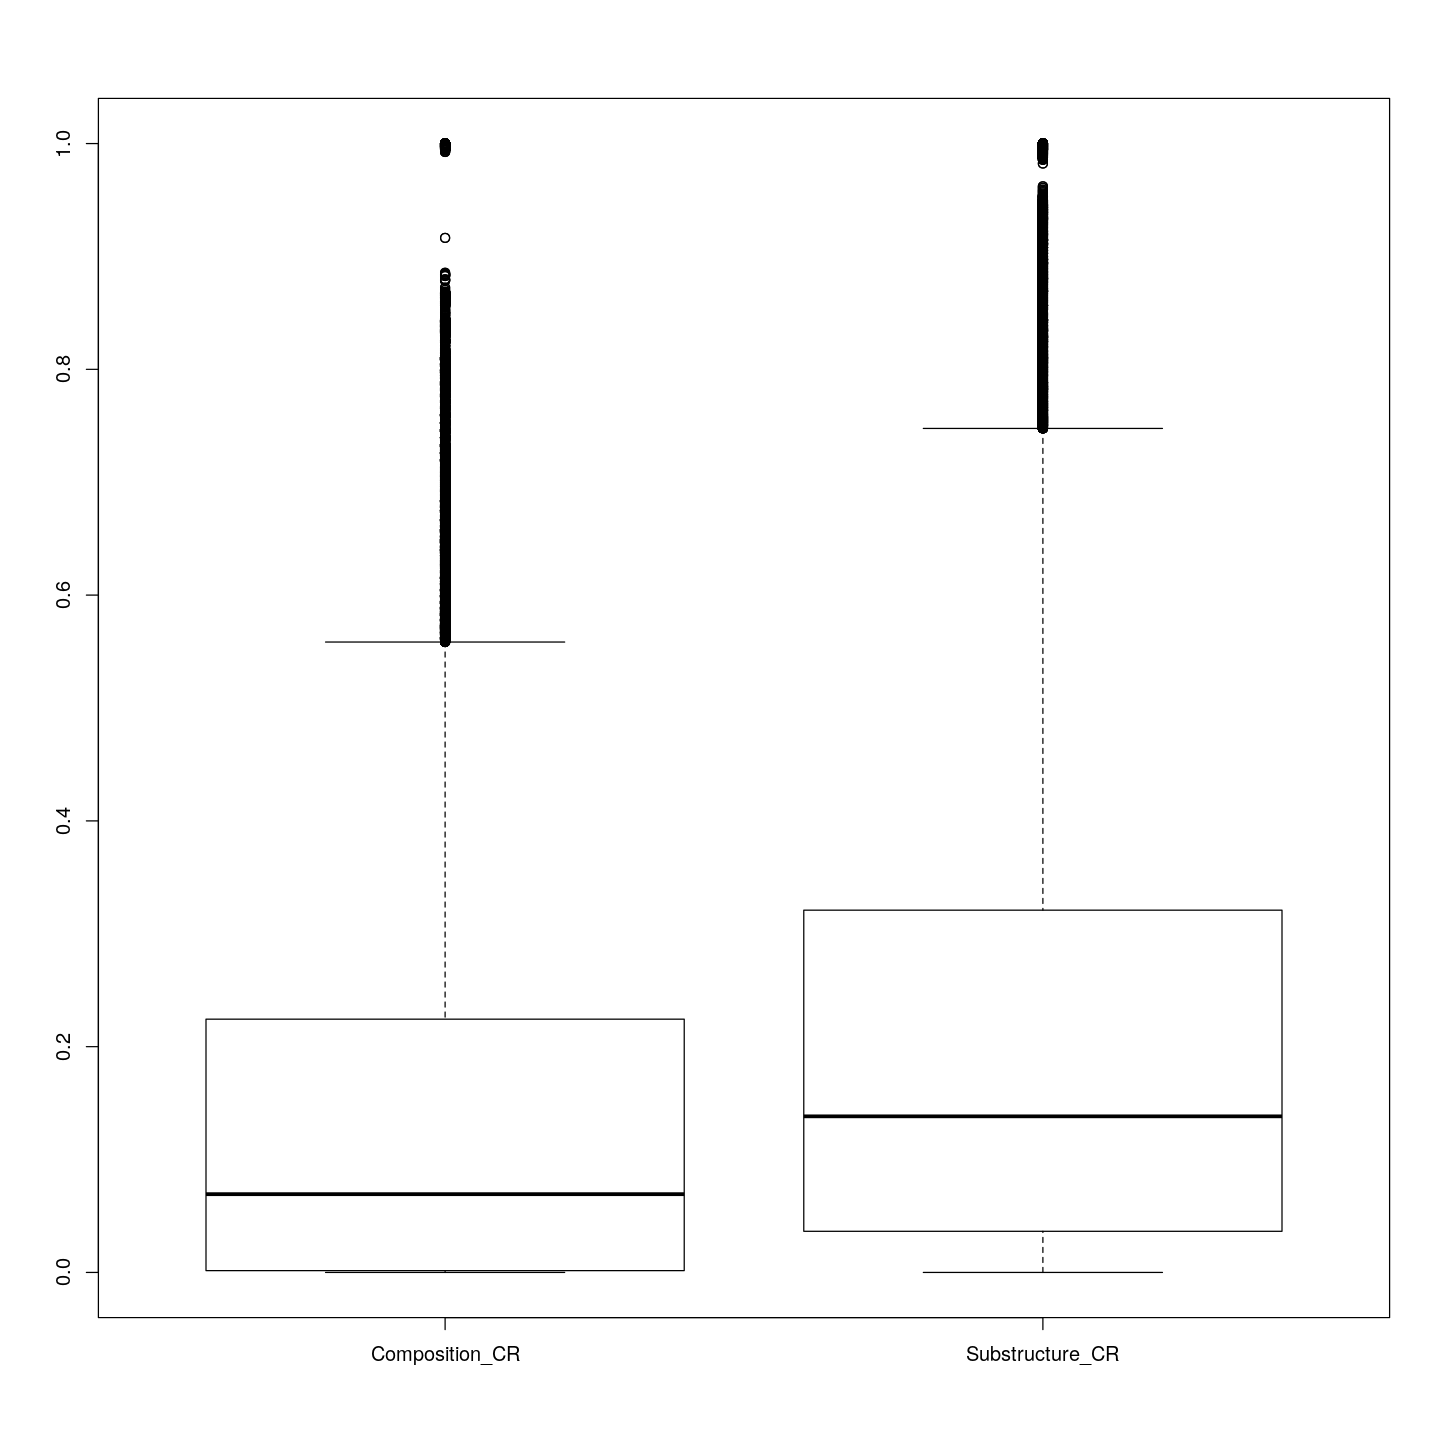

In [119]:
#wilcox.test((as.vector(cr_comp)),(as.vector(cr_subt)))
t.test((as.vector(cr_comp)),(as.vector(cr_subt)))
print(qc<-quantile(cr_comp))
print(qs<-quantile(cr_subt))
(qs[3]-qc[3])/qc[3]

boxplot(list(Composition_CR=as.vector(cr_comp),Substructure_CR=as.vector(cr_subt)))

In [117]:
log2(0.13829637/.06934373)

[1] 0.9959259

In [112]:

pdf('results/heatmaps.sel.pdf',height=20,width=20)

##### select proteins

# Q91ZX7|Q6P6I8 : LIRP1(Q91ZX7) & SIRPA(Q6P6I8) & LAMP1 (P11438)
# P11627|Q810U4 : L1CAM (P11627) & NRCAM (Q810U4)
idx = grepl('Q91ZX7|Q6P6I8|P11438',colnames(r_comp))
ccol=c('red','black','grey')[factor(gsub('_.*','',colnames(r_comp)[idx]),levels=c('Q91ZX7','Q6P6I8','P11438'))]
scol=ccol
#scol=c('red','black','grey')[factor(gsub('_.*','',colnames(r_subt)[idx]),levels=c('Q91ZX7','Q6P6I8','P11438'))]

heatmap.2(log10(unique(r_comp[,idx])+1),trace='none',col=inferno(20),ColSideColors = ccol,main='Composition Abundance\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
heatmap.2(log10(unique(r_subt[,idx])+1),trace='none',col=inferno(20),ColSideColors = scol,main='Substructure Abundance\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
       
cr_comp=(cor(log2(unique(r_comp[,idx])+1),method='spearman'))^2
cr_subt=(cor(log2(unique(r_subt[,idx])+1),method='spearman'))^2
heatmap.2(cr_comp,trace='none',col=plasma,breaks=seq(0,1,.01), ColSideColors = ccol,main='Composition Abundance Spearman R^2\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))
heatmap.2(cr_subt,trace='none',col=plasma,breaks=seq(0,1,.01),ColSideColors = scol,main='Substructure Abundance Spearman R^2\nLIRP1(Q91ZX7) & SIRPA(Q6P6I8)& LAMP1 (P11438)',mar=c(10,10))

###  all proteins
heatmap.2(log10(unique(r_comp)+1),trace='none',col=inferno,main='Counts: Composition Abundance')
heatmap.2(log10(unique(r_subt)+1),trace='none',col=inferno,main='Counts: Substructure Abundance')
       
cr_comp=(cor(log10(unique(r_comp)+1),method='spearman'))^2
cr_comp[is.na(cr_comp)] = 0
cr_subt=(cor(log10(unique(r_subt)+1),method='spearman'))^2
cr_subt[is.na(cr_subt)] = 0


heatmap.2(cr_comp,trace='none',col=plasma,breaks=seq(0,1,.01),main='Counts: Composition Abundance Spearman R^2')
heatmap.2(cr_subt,trace='none',col=plasma,breaks=seq(0,1,.01),main='Counts: Substructure Abundance Spearman R^2')
dev.off()

Warning message in cor(log10(unique(r_comp) + 1), method = "spearman"):
“the standard deviation is zero”


png 
  2